#### IT공학전공 2116309 최민영

# 데이터 사이언스 개론(001)
### [HW #1] 2번 문제: Decision Tree with Iris Data

## 목차
1. 데이터 불러오기
2. Decision Tree 생성: 전체 Attribute 선택
3. Decision Tree 생성: 2개의 Attribute 선택
    * 1~6: 총 6개의 decision tree 생성
4. 평가하기
    * 1: 3번 과정에서 생성한 6개의 모델 중 선택
    * 2: 전체 feature를 사용한 모델과의 비교

## 1. 데이터 불러오기

In [1]:
# 훈련을 위한 model import
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [2]:
# 데이터 로딩
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 입력 항목명
print(iris.feature_names)

# 목표 클래스의 유형 (이름)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## 2. Decision Tree 생성: 전체 Attribute 선택
* iris의 feature에는 총 4개의 feature가 있음
* 4개의 feature를 사용하여 모델 생성

In [4]:
# 입력 데이터 세트 
X = iris.data

# 목표 데이터 세트 
y = iris.target

In [5]:
# 입력 데이터 세트의 행과 열의 크기 출력
print(X.shape)

# 입력 데이터 세트 출력
print(X)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [6]:
# 목표 데이터 세트의 행과 열의 크기 출력
print(y.shape)

# 목표 데이터 세트 출력
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# 데이터 세트의 분리: 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [8]:
# 학습용 입력 데이터 세트
print(X_train.shape)

# 학습용 입력값
print(X_train)

(120, 4)
[[5.1 2.5 3.  1.1]
 [6.2 2.8 4.8 1.8]
 [5.  3.5 1.3 0.3]
 [6.3 2.8 5.1 1.5]
 [6.7 3.  5.  1.7]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [4.6 3.6 1.  0.2]
 [5.  2.3 3.3 1. ]
 [5.5 3.5 1.3 0.2]
 [6.2 2.2 4.5 1.5]
 [5.2 4.1 1.5 0.1]
 [6.9 3.1 5.1 2.3]
 [7.2 3.2 6.  1.8]
 [4.9 3.1 1.5 0.1]
 [5.8 2.8 5.1 2.4]
 [6.7 3.  5.2 2.3]
 [7.7 3.  6.1 2.3]
 [6.7 3.1 5.6 2.4]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.2 2. ]
 [7.6 3.  6.6 2.1]
 [6.2 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.6 2.9 4.6 1.3]
 [5.1 3.5 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [5.7 2.5 5.  2. ]
 [6.5 3.2 5.1 2. ]
 [5.1 3.7 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [6.3 2.5 5.  1.9]
 [6.  2.2 4.  1. ]
 [6.1 2.6 5.6 1.4]
 [6.7 3.3 5.7 2.5]
 [5.7 2.8 4.5 1.3]
 [5.  3.6 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [5.4 3.7 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [5.7 4.4 1.5 0.4]
 [6.  2.9 4.5 1.5]
 [5.6 3.  4.1 1.3]
 [5.4 3.9 1.7 0.4]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [6

In [9]:
# 학습용 목표 데이터 크기
print(y_train.shape)

# 학습용 목표값
print(y_train)

(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


In [10]:
# 테스트용 입력 데이터 세트
print(X_test.shape)

# 테스트용 입력값
print(X_test)

(30, 4)
[[6.1 3.  4.6 1.4]
 [6.1 2.9 4.7 1.4]
 [6.3 2.9 5.6 1.8]
 [4.6 3.4 1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [4.7 3.2 1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.7 2.8 4.1 1.3]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 3.9 1.2]
 [4.4 3.2 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [5.9 3.  4.2 1.5]
 [5.  3.5 1.6 0.6]
 [5.7 2.6 3.5 1. ]
 [6.3 3.3 6.  2.5]
 [5.  3.  1.6 0.2]
 [6.7 2.5 5.8 1.8]
 [5.6 2.7 4.2 1.3]
 [6.4 2.9 4.3 1.3]
 [6.5 2.8 4.6 1.5]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [7.2 3.6 6.1 2.5]
 [5.3 3.7 1.5 0.2]
 [6.3 2.7 4.9 1.8]
 [5.8 2.6 4.  1.2]
 [7.1 3.  5.9 2.1]
 [4.8 3.4 1.6 0.2]]


In [11]:
# 테스트용 목표 데이터 세트
print(y_test.shape)

# 테스트용 목표값
print(y_test)

(30,)
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [12]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [13]:
# 학습 
clf = clf.fit(X_train, y_train)

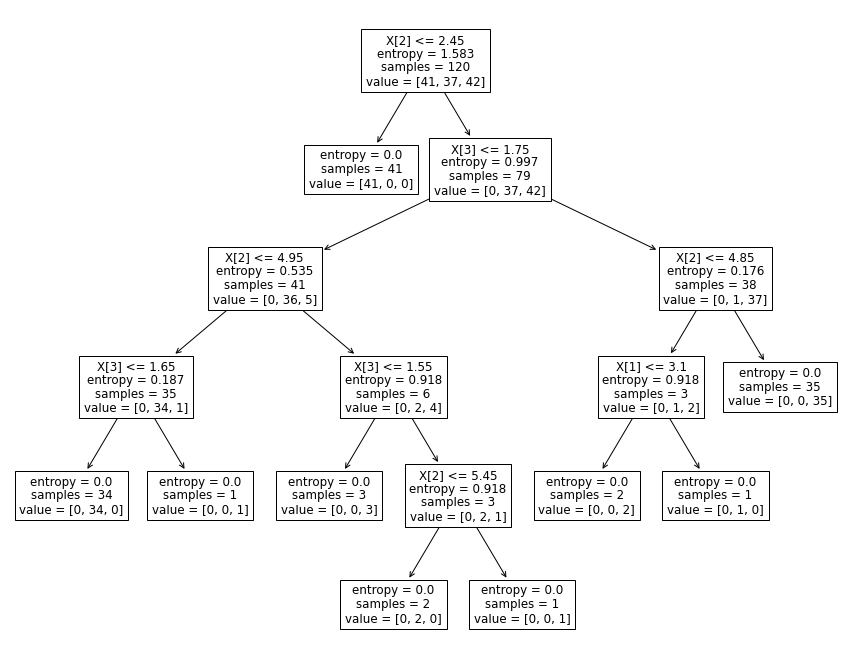

In [14]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf) 
plt.show()

In [15]:
# 분류 예측
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [16]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [17]:
# 정확도 출력
print("정확도:", accuracy_score(y_test, y_pred))

정확도: 1.0


## 3. Decision Tree 생성: 2개 Attribute 선택
* iris의 feature에는 총 4개의 feature가 있음
* 4개 중 2개의 feature를 선택했을 때 나올수 있는 모든 경우의 수(6)로 decision tree를 생성하고, 가장 최적의 모델을 탐색

### 1. iris data의 0, 1번째 feature 사용
* sepal length(0), sepal width(1)

In [18]:
# 입력 데이터 세트의 0, 1번째 feature
X1 = iris.data[:, (0, 1)]

# 목표 데이터 세트 
y1 = iris.target

In [19]:
# 입력 데이터(X2)의 모양 확인, 전체 데이터셋 출력
print(X1.shape)
print(X1)

(150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 

In [20]:
# 데이터 세트의 분리
# 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1234)

In [21]:
# 학습용 입력 데이터 세트 모양과 데이터 확인
print(X1_train.shape)
print(X1_train)

(120, 2)
[[5.1 2.5]
 [6.2 2.8]
 [5.  3.5]
 [6.3 2.8]
 [6.7 3. ]
 [4.8 3.4]
 [4.4 2.9]
 [5.4 3.4]
 [4.6 3.6]
 [5.  2.3]
 [5.5 3.5]
 [6.2 2.2]
 [5.2 4.1]
 [6.9 3.1]
 [7.2 3.2]
 [4.9 3.1]
 [5.8 2.8]
 [6.7 3. ]
 [7.7 3. ]
 [6.7 3.1]
 [4.9 3. ]
 [6.5 3. ]
 [7.6 3. ]
 [6.2 2.9]
 [4.9 2.4]
 [5.6 2.9]
 [5.6 3. ]
 [6.9 3.1]
 [6.6 2.9]
 [5.1 3.5]
 [5.1 3.4]
 [7.4 2.8]
 [5.7 2.5]
 [6.5 3.2]
 [5.1 3.7]
 [5.5 4.2]
 [5.1 3.5]
 [6.3 2.5]
 [6.  2.2]
 [6.1 2.6]
 [6.7 3.3]
 [5.7 2.8]
 [5.  3.6]
 [6.4 2.7]
 [5.4 3.7]
 [7.9 3.8]
 [5.7 4.4]
 [6.  2.9]
 [5.6 3. ]
 [5.4 3.9]
 [5.8 2.7]
 [5.  3.4]
 [6.2 3.4]
 [6.4 2.8]
 [6.  3. ]
 [6.  3.4]
 [5.7 3.8]
 [5.  3.3]
 [5.9 3. ]
 [6.  2.7]
 [5.5 2.6]
 [5.1 3.8]
 [6.7 3.1]
 [6.5 3. ]
 [5.9 3.2]
 [6.3 3.3]
 [6.3 2.5]
 [4.5 2.3]
 [5.4 3.9]
 [4.8 3. ]
 [5.4 3. ]
 [5.5 2.5]
 [5.4 3.4]
 [5.8 2.7]
 [5.7 3. ]
 [6.4 3.1]
 [5.8 2.7]
 [5.7 2.9]
 [4.3 3. ]
 [6.3 2.3]
 [6.  2.2]
 [5.2 3.4]
 [5.1 3.8]
 [6.9 3.1]
 [4.9 2.5]
 [5.  2. ]
 [6.1 2.8]
 [5.6 2.8]
 [5.8 4. ]
 [5.5 2.4]
 

In [22]:
# 학습용 목표 데이터 세트 모양과 데이터 확인
print(y1_train.shape)
print(y1_train)

(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


In [23]:
# 테스트용 입력 데이터 세트, 목표 데이터 세트 확인
print(X1_test.shape)
print(X1_test)

(30, 2)
[[6.1 3. ]
 [6.1 2.9]
 [6.3 2.9]
 [4.6 3.4]
 [5.2 2.7]
 [4.7 3.2]
 [5.2 3.5]
 [5.  3.2]
 [5.7 2.8]
 [7.7 2.8]
 [5.8 2.7]
 [4.4 3.2]
 [7.7 3.8]
 [5.9 3. ]
 [5.  3.5]
 [5.7 2.6]
 [6.3 3.3]
 [5.  3. ]
 [6.7 2.5]
 [5.6 2.7]
 [6.4 2.9]
 [6.5 2.8]
 [6.4 3.2]
 [6.1 2.8]
 [7.2 3.6]
 [5.3 3.7]
 [6.3 2.7]
 [5.8 2.6]
 [7.1 3. ]
 [4.8 3.4]]


In [24]:
# 테스트용 입력 데이터 세트, 목표 데이터 세트 확인
print(y1_test.shape)
print(y1_test)

(30,)
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [25]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [26]:
# 학습 
clf1 = clf.fit(X1_train, y1_train)

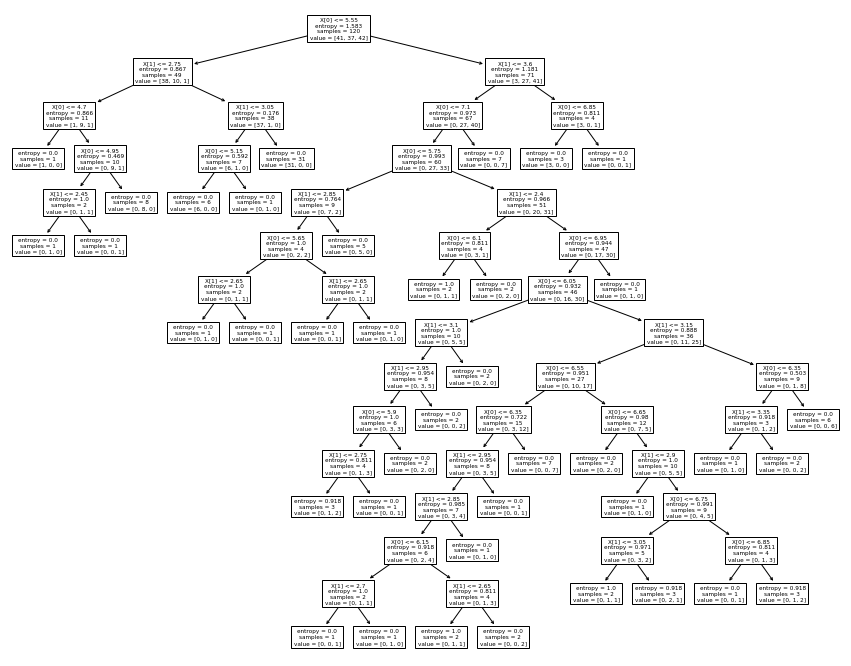

In [27]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf1) 
plt.show()

In [28]:
# 분류 예측
y1_pred = clf1.predict(X1_test)
print(y1_pred)

[2 1 1 0 1 0 0 0 1 2 2 0 2 2 0 2 1 0 1 2 2 2 2 1 2 0 2 2 1 0]


In [29]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y1_test, y1_pred))

[[9 0 0]
 [0 4 9]
 [0 4 4]]


In [30]:
# 정확도 출력
print("정확도:", accuracy_score(y1_test, y1_pred))

정확도: 0.5666666666666667


모델 1 평가
* 트리의 깊이가 높고 복잡한 구조를 가짐
* test data에 대한 정확도가 저조한 것으로 보아 해당 모델은 오버피딩 되었음
* impure한 말단 노드가 있음

### 2. iris data의 0, 2번째 feature 사용
* sepal length(0), petal length(2)

In [31]:
# 입력 데이터 세트의 0, 2번째 feature
X2 = iris.data[:, (0, 2)]

# 목표 데이터 세트 
y2 = iris.target

In [32]:
# 데이터 세트의 분리
# 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1234)

In [33]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [34]:
# 학습 
clf2 = clf.fit(X2_train, y2_train)

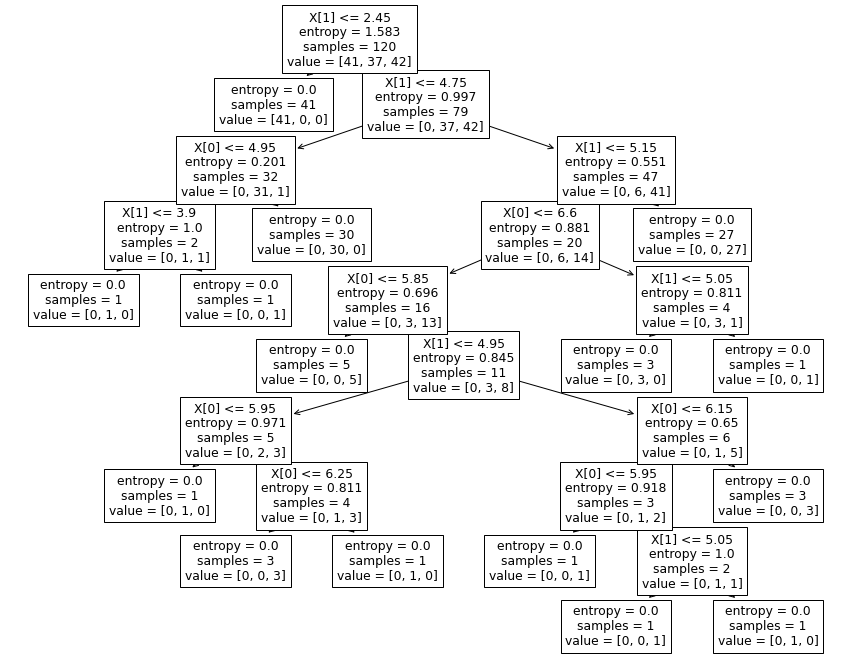

In [35]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf2) 
plt.show()

In [36]:
# 분류 예측
y2_pred = clf2.predict(X2_test)
print(y2_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 1 1 2 0]


In [37]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y2_test, y2_pred))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  1  7]]


In [38]:
# 정확도 출력
print("정확도:", accuracy_score(y2_test, y2_pred))

정확도: 0.9666666666666667


모델 2 평가
* 모델 1보다는 상대적으로 복잡도가 낮음
* 말단 노드가 전부 pure함

### 3. iris data의 0, 3번째 feature 사용
* sepal length(0), petal width(3)

In [39]:
# 입력 데이터 세트의 0, 3번째 feature
X3 = iris.data[:, (0, 3)]

# 목표 데이터 세트 
y3 = iris.target

In [40]:
# 데이터 세트의 분리
# 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=1234)

In [41]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [42]:
# 학습 
clf3 = clf.fit(X3_train, y3_train)

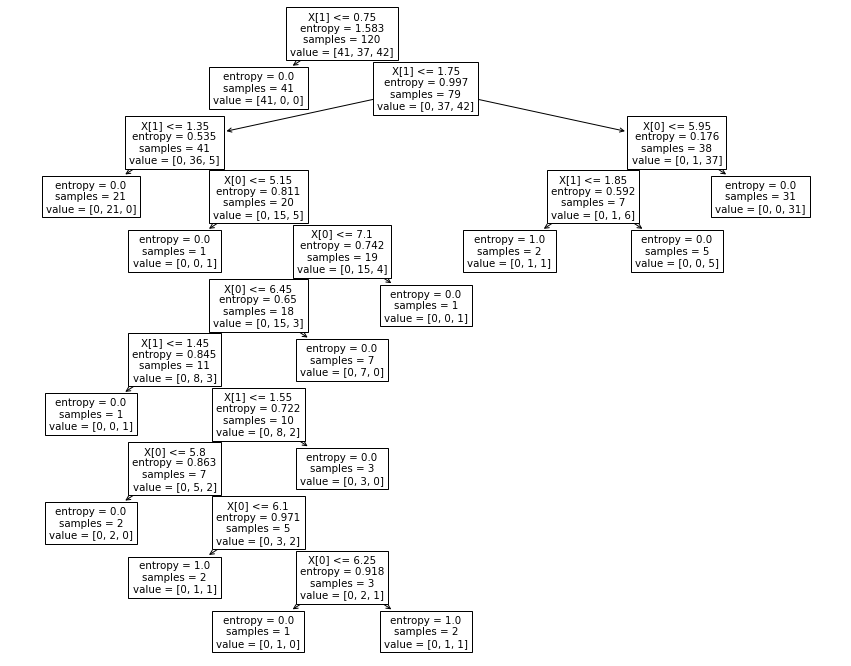

In [43]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf3) 
plt.show()

In [44]:
# 분류 예측
y3_pred = clf3.predict(X3_test)
print(y3_pred)

[2 2 2 0 2 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [45]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y3_test, y3_pred))

[[ 9  0  0]
 [ 0 10  3]
 [ 0  0  8]]


In [46]:
# 정확도 출력
print("정확도:", accuracy_score(y3_test, y3_pred))

정확도: 0.9


모델 3 평가
* 앞선 모델(2)에 비해서는 test data에 대한 정확도가 떨어짐
* impure한 말단 노드가 있음

### 4. iris data의 1, 2번째 feature 사용
* sepal width(1), petal length(2)

In [47]:
# 입력 데이터 세트의 1, 2번째 feature
X4 = iris.data[:, (1, 2)]

# 목표 데이터 세트 
y4 = iris.target

In [48]:
# 데이터 세트의 분리
# 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=1234)

In [49]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [50]:
# 학습 
clf4 = clf.fit(X4_train, y4_train)

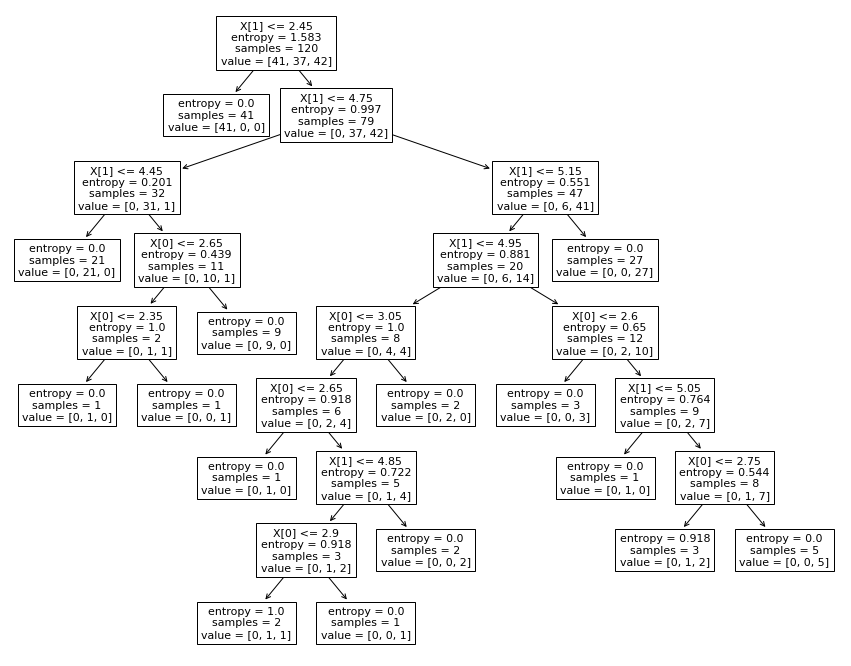

In [51]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf4) 
plt.show()

In [52]:
# 분류 예측
y4_pred = clf4.predict(X4_test)
print(y4_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [53]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y4_test, y4_pred))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [54]:
# 정확도 출력
print("정확도:", accuracy_score(y4_test, y4_pred))

정확도: 1.0


모델 4 평가
* test data에 대한 정확도가 1.0임
* train 과정에서 impure한 말단 노드가 있음

### 5. iris data의 1, 3번째 feature 사용
* sepal width(1), petal width(3)

In [55]:
# 입력 데이터 세트의 1, 3번째 feature
X5 = iris.data[:, (1, 3)]

# 목표 데이터 세트 
y5 = iris.target

In [56]:
# 데이터 세트의 분리
# 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=1234)

In [57]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [58]:
# 학습 
clf5 = clf.fit(X5_train, y5_train)

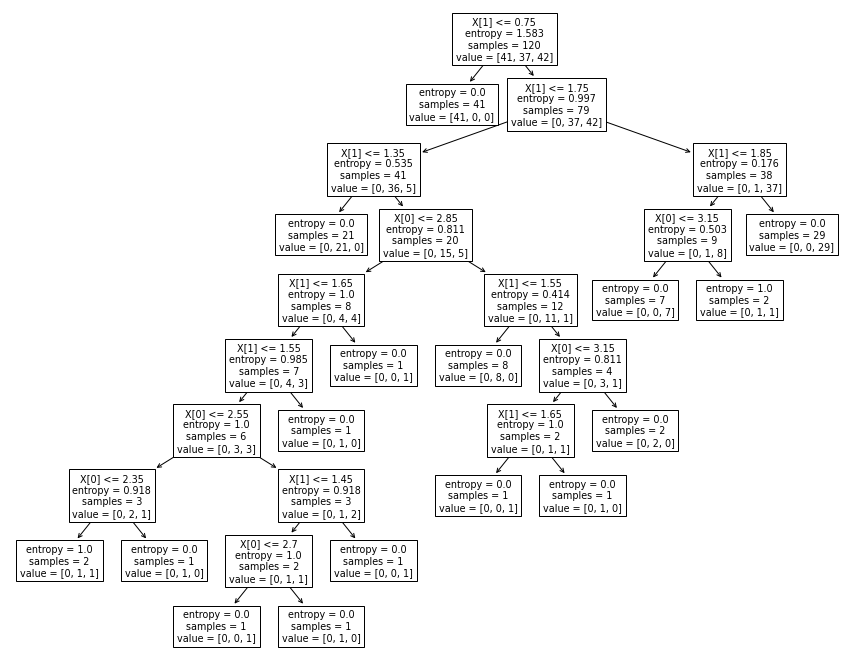

In [59]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf5) 
plt.show()

In [60]:
# 분류 예측
y5_pred = clf5.predict(X5_test)
print(y5_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 2 1 1 2 0 2 1 2 0]


In [61]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y5_test, y5_pred))

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]


In [62]:
# 정확도 출력
print("정확도:", accuracy_score(y5_test, y5_pred))

정확도: 0.9666666666666667


모델 5 평가
* 정확도가 1.0에 가까움
* train 과정에서 impure한 노드가 있음

### 6. iris data의 2, 3번째 feature 사용
* petal length(2), petal width(3)

In [63]:
# 입력 데이터 세트의 1, 3번째 feature
X6 = iris.data[:, (2, 3)]

# 목표 데이터 세트 
y6 = iris.target

In [64]:
# 데이터 세트의 분리
# 학습용 입력값, 테스트용 입력값, 학습용 목표값, 테스트용 목표값 
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=1234)

In [65]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [66]:
# 학습 
clf6 = clf.fit(X6_train, y6_train)

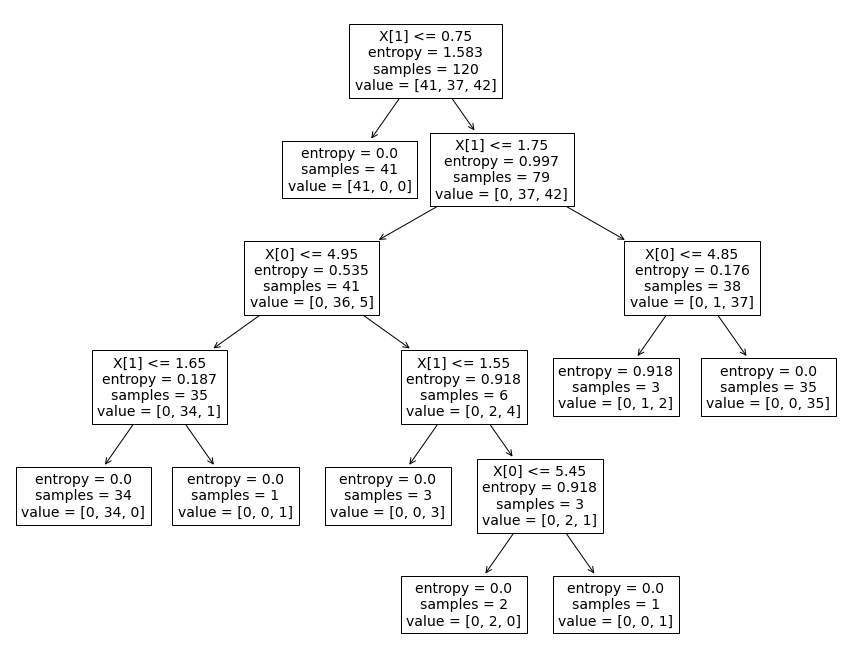

In [67]:
# 그래프 출력 영역
plt.figure(figsize=(15, 12))

# 학습된 모형 출력
tree.plot_tree(clf6) 
plt.show()

In [68]:
# 분류 예측
y6_pred = clf6.predict(X6_test)
print(y6_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [69]:
# 평가: 혼동 행렬 출력
print(confusion_matrix(y6_test, y6_pred))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [70]:
# 정확도 출력
print("정확도:", accuracy_score(y6_test, y6_pred))

정확도: 1.0


모델 6 평가
* 앞선 모델들 중에서 트리의 깊이가 가장 낮음
* test data에 대한 정확도가 1.0임

## 4. 평가하기

### 1. 6개의 모델 중 선택
위의 과정 3에서 만든 6개의 decision tree 중 가장 적합한 모델 선택

> petal length, petal width feature를 사용하여 만든 모델(6번)이 가장 적합함

* tree의 깊이가 5로 다른 tree 모델에 비해 구조가 상대적으로 덜 복잡함
* 다른 모델에 비해 train data에 대한 오버피팅이 일어나지 않았음
    * 과정 3의 6개 모델 중 모델 1이 높은 복잡도를 가졌지만 정확도에서 0.56이라는 값이 나온 것으로 보아 모델 1은 오버피딩이 되었다고 판단할 수 있음
* 완성된 tree를 test data에 적용시켰을 때 정확도가 1.0이 나옴

### 2. 최종 모델 선택
4개의 속성을 사용하여 만든 decision tree와 2개의 속성을 사용하여 만든 decision tree중 선택

> 과정 3에서 만든 6번 모델이 과정 2의 feature를 2개만 사용해서 만든 모델보다 적합함

(편의상 과정 3에서 선택된 6번 모델을 'model2', 과정 2의 feature를 2개만 사용해서 만든 모델을 'model1'이라 칭함)

* model1과 model2는 둘 다 tree의 depth이 5로 동일하고, test data에 대한 정확도 역시 1.0으로 동일
* 하지만 feature를 4개 사용한 model1과는 달리 model2는 2개의 feature만으로 분류를 완료하였기 때문에 model2가 더 간단한 모형이라고 판단됨